In [13]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import random
plt.style.use('dark_background')

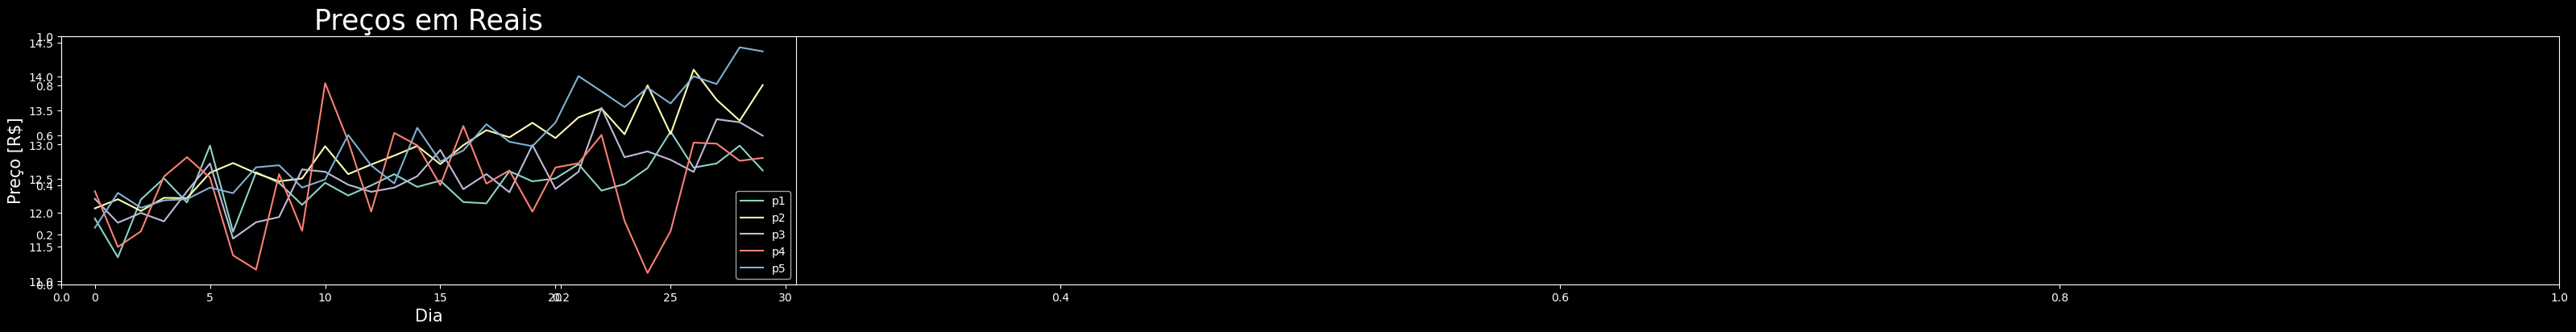

In [14]:
def MBG(po,mu,sigma,t):
    w = np.random.normal(0,1, t)
    t=np.arange(0,t)
    return po*np.exp((mu-(sigma**2)/2)*t+sigma*w)


po    =    [12,   12,   12,   12, 12]
mu    =    [.003, 0.005, 0.0033, 0.0041, 0.006]
sigma =    [0.033,  0.015,  0.02, 0.05, 0.022]
t     =    30

df=None

for i in range(len(po)):
    
    if df is None:
        df=pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))
    else:
        df=pd.concat([df,pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))],axis=1)

df.columns=list(['p'+str(x) for x in range(1,len(po)+1)])

fig = plt.subplots(figsize=(40,4))

ax1=plt.subplot(1,3, 1) 
df[df.columns[:5]].plot(ax=ax1)
ax1.set_title('Preços em Reais',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax1.set_xlabel('Dia',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)   
plt.legend(loc='lower right')

In [15]:
df.diff().corr()

,p1,p2,p3,p4,p5
p1,1.000000,-0.253947,0.254496,0.161036,-0.061959
p2,-0.253947,1.000000,0.006074,0.194887,0.225601
p3,0.254496,0.006074,1.000000,0.027867,-0.135430
p4,0.161036,0.194887,0.027867,1.000000,0.017497
p5,-0.061959,0.225601,-0.135430,0.017497,1.000000



Preços [R$]:
          p1         p2         p3         p4         p5
0  11.916127  12.064793  12.204159  12.317480  11.779517
1  11.346880  12.198568  11.854166  11.498791  12.292301
2  12.194812  12.026686  11.997924  11.728544  12.072950
3  12.505438  12.219174  11.873980  12.531677  12.181764
4  12.150626  12.214202  12.314021  12.815279  12.200189

Retornos [%]:
         r1        r2        r3        r4        r5
1 -4.777118  1.108813 -2.867814 -6.646562  4.353185
2  7.115832 -1.424661  1.177943  1.865255 -1.862137
3  2.606769  1.595453 -1.015590  6.520273  0.923752
4 -2.977572 -0.041209  3.605664  2.302436  0.156414

Matriz de Volatilidade [%]:
          r1        r2        r3        r4        r5
r1  3.901517 -0.000000  0.000000  0.000000 -0.000000
r2 -0.000000  2.992109  0.000000  0.000000  0.000000
r3  0.000000  0.000000  3.787418  0.000000 -0.000000
r4  0.000000  0.000000  0.000000  6.942775  0.000000
r5 -0.000000  0.000000 -0.000000  0.000000  3.013448



Text(0.5, 1.0, 'Correlações entre ativos ')

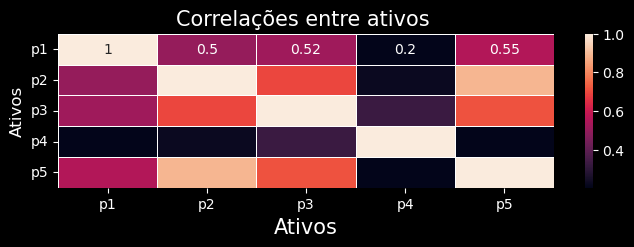

In [16]:
ret=df.diff().dropna().copy()
ret=100*ret/df.iloc[0]

ret.columns=list(['r'+str(x) for x in range(1,len(po)+1)])

C=ret.cov()

sig=ret.std()

MU=ret.sum()

I=pd.DataFrame(np.identity(len(C)))

SIGMA=(C*(I.values))**0.5

P=df.corr()
print()
print("Preços [R$]:")
print(df.head())
print('')
print("Retornos [%]:")
print(ret.head(4))
print('')
print("Matriz de Volatilidade [%]:")
print(SIGMA)
print()
f, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(P, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Correlações entre ativos ",fontsize=15) 

In [17]:
q=[ 0.2, 0.8]

print()
print('Os pesos dos ativos r1 e r2 são %.2f e %.2f, respectivamente ' % (q[0],q[1]))
print()

r1,r2=ret['r1'],ret['r2']

print('O retorno e risco de r1 : %.2f e %.2f' % (np.mean(r1),np.std(r1)))
print()
print('O retorno e risco de r2 : %.2f e %.2f' % (np.mean(r2),np.std(r2)))
print()

rp=q[0]*r1+q[1]*r2

print('O retorno e risco de rp em : %.2f e %.2f' % (np.mean(rp),np.std(rp)))
print()

mup=q[0]*np.mean(r1)+q[1]*np.mean(r2)
sigp=(np.mean(np.multiply(rp,rp))-np.multiply(np.mean(rp),np.mean(rp)))**0.5

print('Alternativamente, o retorno e risco de rp : %.2f e %.2f' % (mup,sigp))
print()


Os pesos dos ativos r1 e r2 são 0.20 e 0.80, respectivamente 

O retorno e risco de r1 : 0.20 e 3.83

O retorno e risco de r2 : 0.52 e 2.94

O retorno e risco de rp em : 0.45 e 2.28

Alternativamente, o retorno e risco de rp : 0.45 e 2.28



In [18]:
q=np.array([0.4, 0.6])
print()
print('Os pesos dos ativos r1 e r2 são %.2f e %.2f, respectivamente ' % (q[0],q[1]))
print()

r=ret[['r1','r2']]

C=r.cov()
MU=r.mean()

retp=np.dot(pd.DataFrame(q).transpose(),MU)

risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),np.array(q)))

print('O retorno e risco de rp em : %.2f e %.2f' % (retp,risp))
print()

N=len(ret.columns)
q = [random.randint(0,1000) for i in range(1,N+1)]
s = sum(q)
q = [ i/s for i in q ]
print(np.sum(q))

rp=np.dot(ret,q)
C=ret.cov()
MU=ret.mean()
retp=np.dot(pd.DataFrame(q).transpose(),MU)
risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))


print()
print('Os pesos dos ativos são:',[round(q[i],2) for i in range(len(q))])
print()
print('O retorno e risco de rp em : %.2f e %.2f' % (retp[0], risp[0][0]))
print()


Os pesos dos ativos r1 e r2 são 0.40 e 0.60, respectivamente 

O retorno e risco de rp em : 0.39 e 2.06

1.0

Os pesos dos ativos são: [0.35, 0.08, 0.35, 0.02, 0.2]

O retorno e risco de rp em : 0.36 e 2.17



C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\3592384047.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('O retorno e risco de rp em : %.2f e %.2f' % (retp,risp))


In [19]:
def Portfolios(ret,ports):
    retp=[]
    risp=[]
    C=ret.cov()
    MU=ret.mean()
    SIG=ret.std()
    N=len(ret.columns)
    for i in tqdm(range(ports)):
        q = [random.randint(0,10000) for i in range(1,N+1)]
        s = sum(q)
        q = [ i/s for i in q ]

        retp.append(np.dot(pd.DataFrame(q).transpose(),MU)[0])
        risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])
    return retp, risp, SIG, MU
    
retp, risp, SIG, MU=Portfolios(ret,1000) 

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1854.40it/s]


C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\324408272.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.plot(SIG[p], MU[p], 'b*', markersize=15.0)
C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\324408272.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)


Text(0.5, 1.0, '1000 Portifolios')

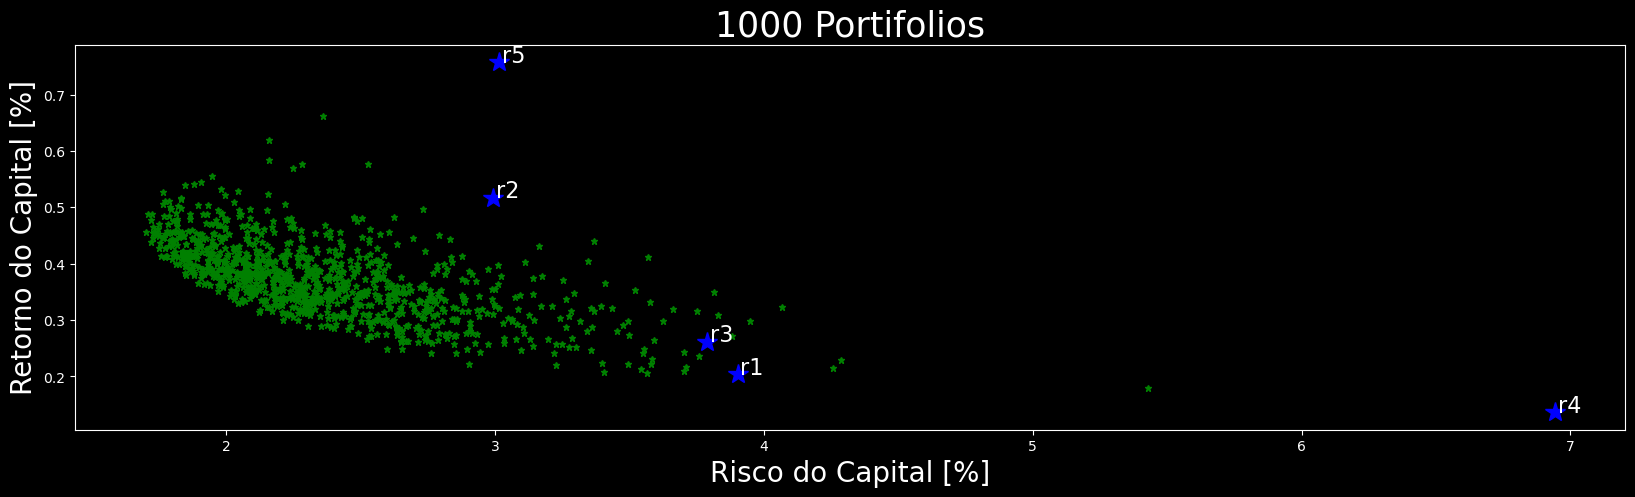

In [20]:
fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1)     
for p in range(0,len(retp)):
    ax1.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#    ax1.text(100*(sig[p]+0.001), 100*MU[p],df.columns[p], fontsize=8)

for p in range(0,len(SIG)):
    ax1.plot(SIG[p], MU[p], 'b*', markersize=15.0) 
    ax1.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ax1.set_ylabel("Retorno do Capital [%]",fontsize=20)
ax1.set_xlabel("Risco do Capital [%]",fontsize=20)
ax1.set_title(str(len(retp))+" Portifolios",fontsize=25) 

In [21]:
def TPM_Fronteira(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    #N=1000
    a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    target_mus=np.arange(-0.5,1.0,0.002)
    risk_at_target_mus=np.zeros(len(target_mus))
    for i in tqdm(range(0, len(target_mus))):
        target_mu=target_mus[i]
        v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
        v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
        v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
        opt_q=(v1+v2)/v3
        risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
    return risk_at_target_mus, target_mus

risk_at_target_mus, target_mus = TPM_Fronteira(ret,1000)

  0%|                                                                                          | 0/750 [00:00<?, ?it/s]C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\1594289108.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\1594289108.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\1594289108.py:18: DeprecationWarning: Convers

C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\3686220063.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(SIG[p], MU[p], 'y*', markersize=15.0)
C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\3686220063.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)


Text(0.5, 0, 'Risco do Capital [%]')

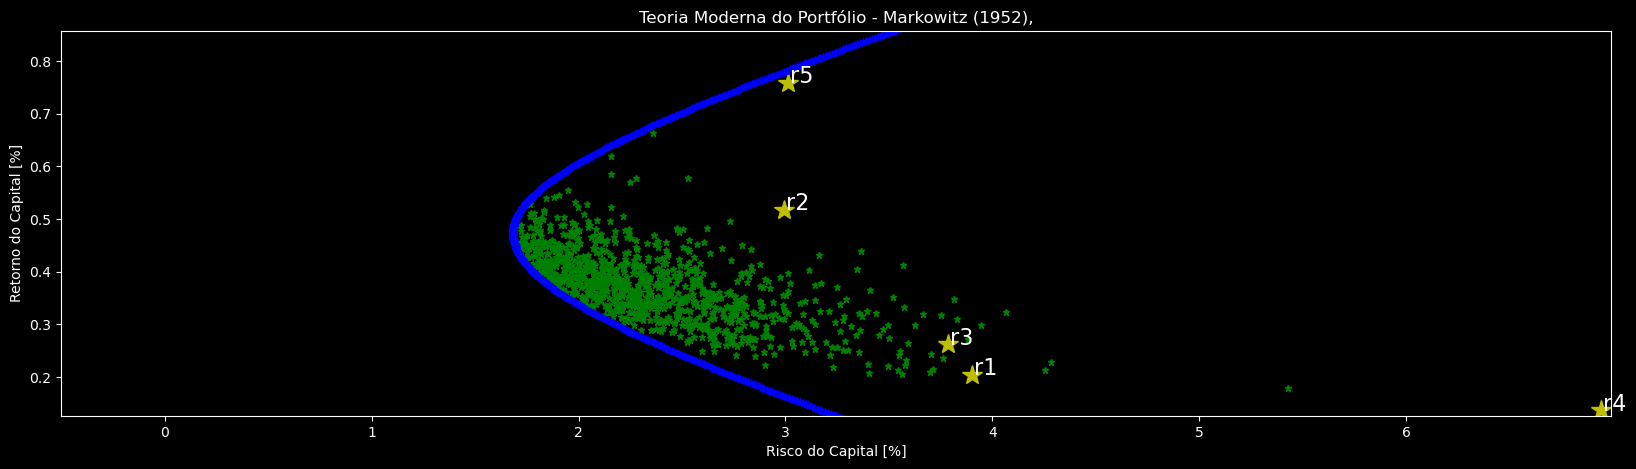

In [22]:
fig = plt.subplots(figsize=(20,5))
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)
plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.1])
plt.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

plt.plot(risk_at_target_mus,target_mus,'b*')
#plt.axis([-0.5,np.max(100*SIG),0,np.max(100*MU)])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital [%]')
plt.xlabel('Risco do Capital [%]')


C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\1034961421.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(SIG[p], MU[p], 'y*', markersize=15.0)
C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\1034961421.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)
C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\1034961421.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se


Os pesos dos ativos no portifólio de menor risco: [0.22, 0.32, 0.17, 0.01, 0.29]



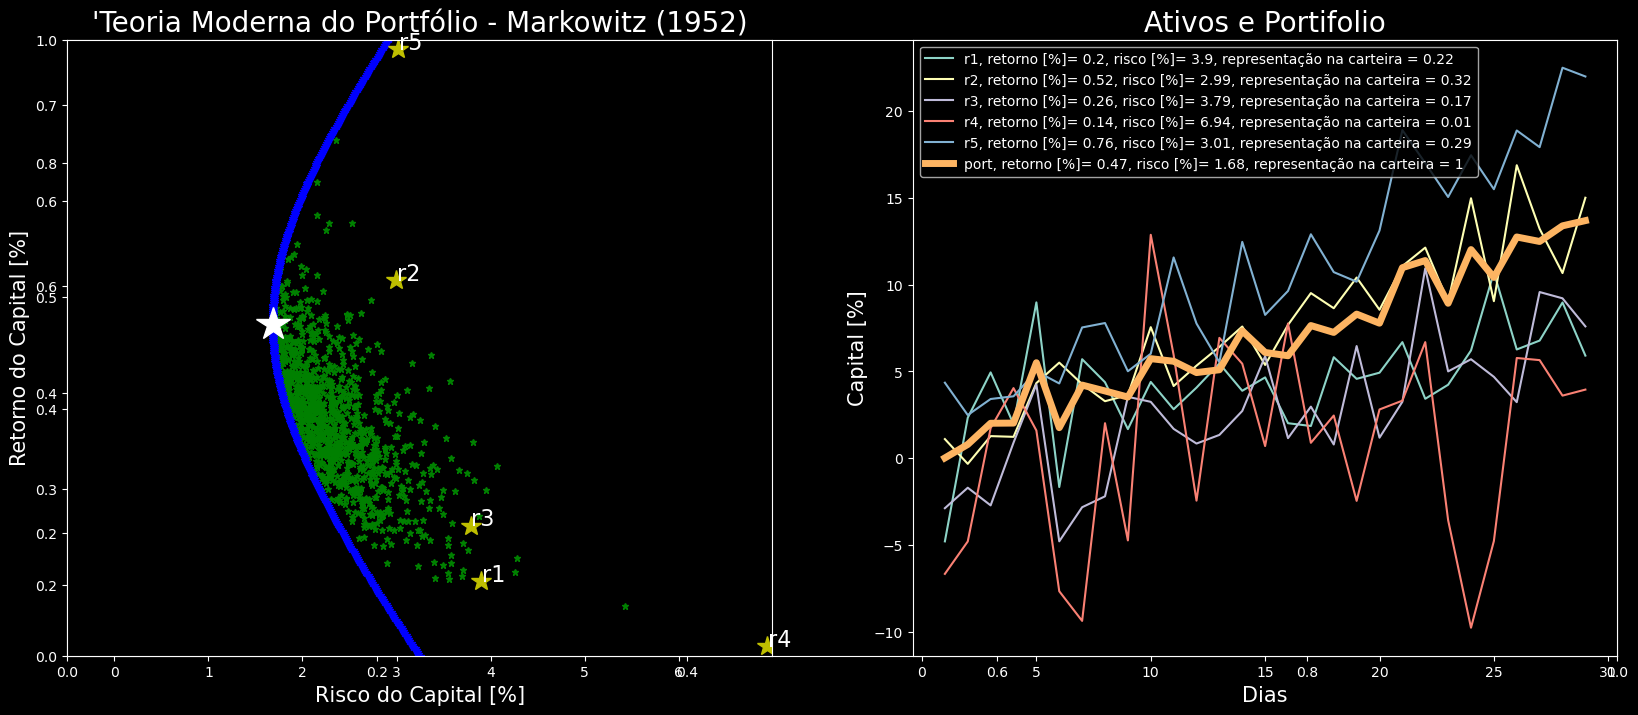

In [23]:
def TPM_Menor_Risco(ret):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    q_minrisk=np.dot(np.linalg.inv(C),pd.DataFrame(ONE))/d
    mu_minrisk=np.dot(q_minrisk.transpose(),MU.values)
    risk_minrisk=(np.dot(np.dot(pd.DataFrame(q_minrisk).transpose(),C),pd.DataFrame(q_minrisk)))**0.5
    return q_minrisk,mu_minrisk,risk_minrisk

q_minrisk,mu_minrisk,risk_minrisk = TPM_Menor_Risco(ret)

fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 

for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'w*',markersize=25)

plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.01])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ret['port']=pd.DataFrame(ret*[q_minrisk[i][0] for i in range(len(q_minrisk))]).sum(axis=1)
pesos=[q_minrisk[i][0] for i in range(len(q_minrisk))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
ax2.legend(loc='upper left')


ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(q_minrisk[i][0],2) for i in range(len(q_minrisk))])
print()


ret=ret.drop(columns=['port'])

C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\4173385683.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(SIG[p], MU[p], 'y*', markersize=15.0)
C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\4173385683.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)
C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\4173385683.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se


Os pesos dos ativos no portifólio de menor risco: [0.08, 0.28, 0.09, -0.05, 0.6]



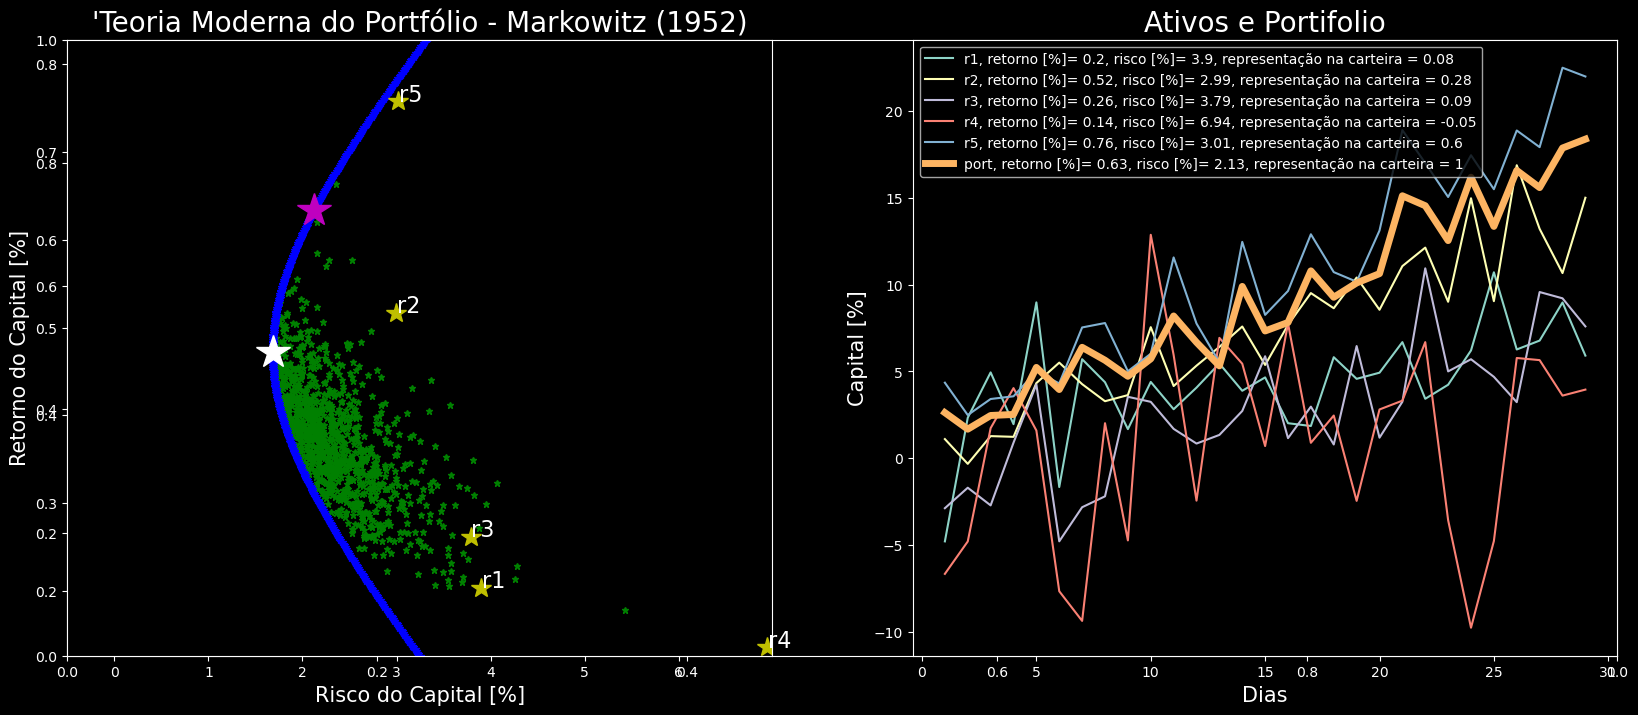

In [24]:
ret.sum()
def TPM_Maior_Sharpe(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    rf=0.2
    temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
    qm=temp/temp.sum()
    mu_m=np.dot(qm.transpose(),MU)
    sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
    return qm,mu_m,sigma_m

qm,mu_m,sigma_m = TPM_Maior_Sharpe(ret,1000)

fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'w*',markersize=25)

ax1.plot(sigma_m,mu_m,'m*',markersize=25)


plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.07])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ret['port']=pd.DataFrame(ret*[qm[i][0] for i in range(len(qm))]).sum(axis=1)
pesos=[qm[i][0] for i in range(len(qm))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  

ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(qm[i][0],2) for i in range(len(qm))])
print()


ret=ret.drop(columns=['port'])

C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\804512671.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arbitrary_line=sig[1]*(target_mus-rf)/(MU[1]-rf)
C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\804512671.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(SIG[p], MU[p], 'y*', markersize=15.0)
C:\Users\Kenny G\AppData\Local\Temp\ipykernel_15324\804512671.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]


Os pesos dos ativos no portifólio de menor risco: [0.08, 0.28, 0.09, -0.05, 0.6]



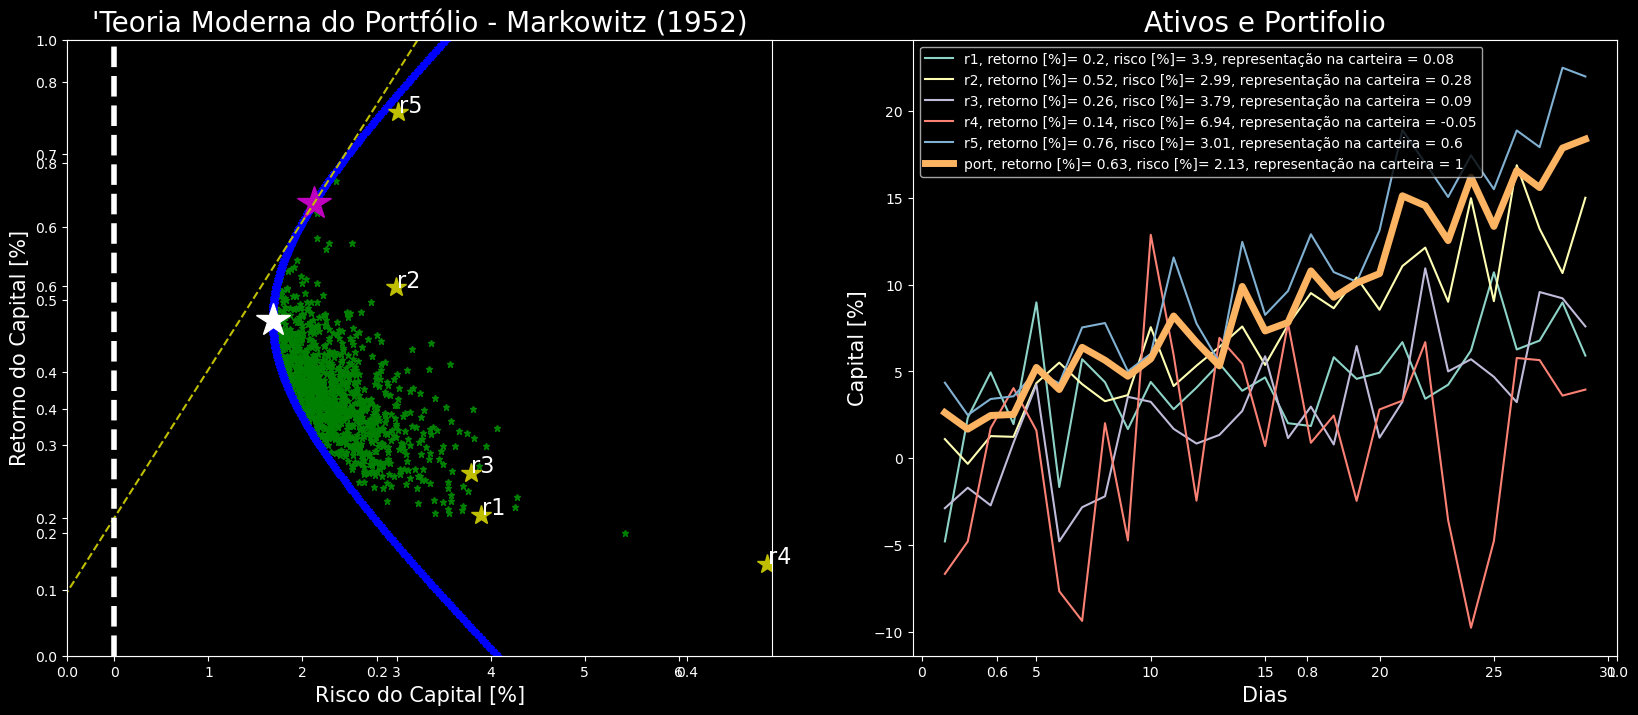

In [25]:
rf=0.2
sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
cm_line=sigma_m[0][0]*(target_mus-rf)/(mu_m-rf)
arbitrary_line=sig[1]*(target_mus-rf)/(MU[1]-rf)


fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)


ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'w*',markersize=25)

ax1.plot(sigma_m,mu_m,'m*',markersize=25)
ax1.plot(cm_line,target_mus,'y--')

plt.axis([-0.5,np.max(SIG)+0.05,0.01,np.max(MU)+.1])
ax1.axvline(x= 0, color= 'w',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

if 'port' in ret.columns: 
    ret=ret.drop(columns=['port'])


ret['port']=pd.DataFrame(ret*[qm[i][0] for i in range(len(qm))]).sum(axis=1)
pesos=[qm[i][0] for i in range(len(qm))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
    
    
ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(qm[i][0],2) for i in range(len(qm))])
print()

ret=ret.drop(columns=['port'])